In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import matplotlib.pyplot as plt
import pandas as pd

## Average left-over tokens

These results were obtained on the updated setup with TriviaQA subset using 4000-8000 character-long documents (from `search_results`, instead of `wiki_context`).

Baseline results are taken from `2023-08-topk-before` experiments.

## Results

In [10]:
df = pd.read_json("./results/triviaqa_add_avg.jsonl", lines=True)

In [11]:
df

,model,acc,k,add_avg,open_book,_duration
0,pythia-70m,0.0175,16,False,True,52.992848
1,pythia-70m,0.0150,16,True,True,60.465594
2,pythia-70m,0.0125,32,False,True,55.125522
3,pythia-70m,0.0150,32,True,True,54.913465
4,pythia-70m,0.0125,64,False,True,53.274616
5,pythia-70m,0.0175,64,True,True,56.730759
6,pythia-70m,0.0150,128,False,True,55.740997
7,pythia-70m,0.0175,128,True,True,50.464768
8,pythia-70m,0.0225,256,False,True,56.404118
9,pythia-70m,0.0200,256,True,True,60.271057


In [12]:
# Filter out the smaller models
models_to_plot = ["pythia-410m", "pythia-1b", "pythia-1.4b", "pythia-2.8b"]
df = df.loc[df["model"].isin(models_to_plot)]

In [14]:
df_b = pd.read_json("./results/triviaqa_baseline.jsonl", lines=True)
df_b = df_b.loc[df_b["model"].isin(models_to_plot)]

In [15]:
model_grouped = df.groupby("model", sort=False)

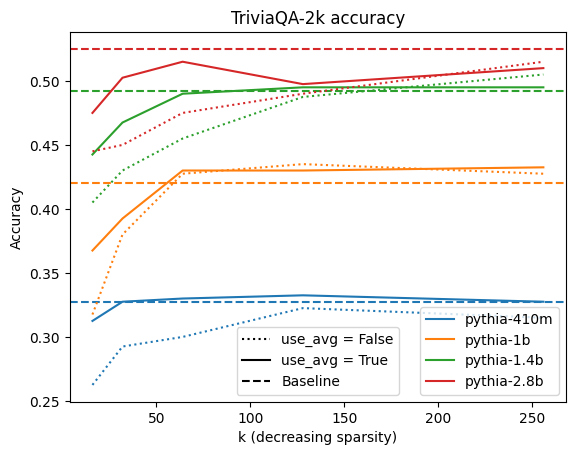

In [18]:
fig, axes = plt.subplots()
linestyles = [":", "-"]
models = []
for i, (model, group) in enumerate(model_grouped):
    models.append(model)
    col = f"C{i}"
    
    # Plot dense baseline
    y = df_b.loc[(df_b["model"] == model) & (df_b['open_book'] == True), "acc"].values[0]
    plt.axhline(y = y, color = col, linestyle="--")
    
    avg_grouped = group.groupby("add_avg")
    for (use_avg, group), linestyle in zip(avg_grouped, linestyles):
        axes.plot(group["k"], group["acc"], label=f"{model}, use_avg={use_avg}", color=col, linestyle=linestyle)
lines = axes.get_lines()[2::3]

# Dummy lines
dummy_lines = []
for linestyle in linestyles:
    dummy_lines.append(axes.plot([],[], c="black", linestyle=linestyle)[0])
# Add baseline line
dummy_lines.append(axes.plot([],[], c="black", linestyle="--")[0])

legend1 = axes.legend(lines, models, loc="lower right")
legend2 = axes.legend(dummy_lines, ["use_avg = False", "use_avg = True", "Baseline"], loc="lower center")
axes.add_artist(legend1)
plt.xlabel("k (decreasing sparsity)")
plt.ylabel("Accuracy")
plt.title("TriviaQA-2k accuracy")
plt.show()

The results seem to indicate a consistent improvement up to $k = 64$, while for decreased levels of sparsity the change has diminishing effect as expected.